First few rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         9

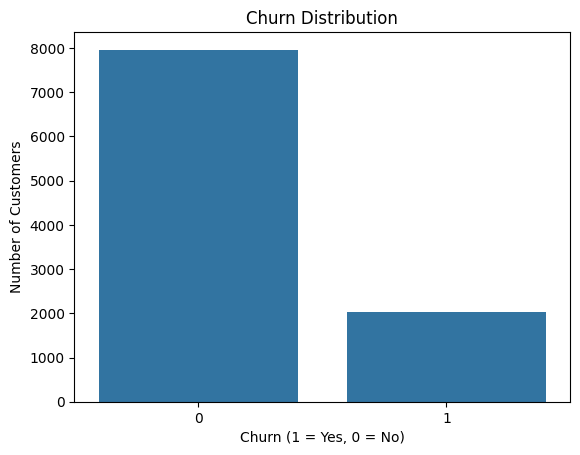

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')  # Use correct path if in a different folder

# Show basic info
print("First few rows of the dataset:")
print(data.head())
print("Column names in the dataset:")
print(data.columns)

# Target variable is 'Exited' that shows churn (1 = churned, 0 = not churned)
data.rename(columns={'Exited': 'churn'}, inplace=True)

# Remove non-informative or identifiers
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables: 'Geography' and 'Gender'
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Features and target
X = data.drop('churn', axis=1)
y = data['churn']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}
# Train and test models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
    print("Classification Report:", classification_report(y_test, y_pred))
    print("="*50)

# Churn distribution plot
sns.countplot(x='churn', data=data)
plt.title('Churn Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.show()
